
# Project: Exploring and Analysing European Football

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The dataset chosen for the following analysis is "The Soccer Database" put together by Hugo Mathien on Kaggle. The dataset provides in depth information about European Soccer Competitions held between 2008-2016 including data of about 25,000 matches, 10,000 players, 300 teams from all the major European leagues.
To explore the data, relative tables were created in SQL to effectively depict the relation between team attributes and thier Home and Away success through the years. 

> **Q1**: What team has improved the most when comparing the performance for 2008-09 season to the 2015-16 season?

> **Q2**: Analysis of playing styles for the most successful teams for both 2008-09 and 2015-16 season, Is there a change in playing philosophy?

In [358]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling



### General Properties

> The tables were loaded through the pandas read function and some basic information is printed for clarity about the structure of the dataframes

In [359]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
team_08=pd.read_csv('teamatt08.csv')                  #Team name and Team attributes (Playing style)
team_16=pd.read_csv('teamatt16.csv')                  #Team name and Team attributes (Playing style)
play_08=pd.read_csv('playatt08.csv')                  #Player name and Player attributes(2008-09)
play_16=pd.read_csv('playatt16.csv')                  #Player name and Player attributes(2015-16)
home=pd.read_csv('home_match.csv')                    #Matches played at home (2008-2016)
away=pd.read_csv('away_match.csv')                    #Matches played away from home (2008-2016)

In [360]:
team_08.head(3)

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name,id.1,team_fifa_api_id.1,team_api_id.1,date,buildUpPlaySpeed,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,49119,9930,434,FC Aarau,AAR,1,434,9930,2010-02-22 00:00:00,60,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,39393,8485,77,Aberdeen,ABE,4,77,8485,2010-02-22 00:00:00,70,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
2,11817,8576,614,AC Ajaccio,AJA,10,614,8576,2010-02-22 00:00:00,60,...,55,Normal,Organised,30,Deep,70,Double,30,Narrow,Offside Trap


In [361]:
team_08.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 30 columns):
id                                241 non-null int64
team_api_id                       241 non-null int64
team_fifa_api_id                  241 non-null int64
team_long_name                    241 non-null object
team_short_name                   241 non-null object
id.1                              241 non-null int64
team_fifa_api_id.1                241 non-null int64
team_api_id.1                     241 non-null int64
date                              241 non-null object
buildUpPlaySpeed                  241 non-null int64
buildUpPlaySpeedClass             241 non-null object
buildUpPlayDribbling              0 non-null float64
buildUpPlayDribblingClass         241 non-null object
buildUpPlayPassing                241 non-null int64
buildUpPlayPassingClass           241 non-null object
buildUpPlayPositioningClass       241 non-null object
chanceCreationPassing             241 no

In [362]:
play_16.head(3)

,player_name,birthday,height,weight,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,1,218353,505942,2016-02-18 00:00:00,67,71,...,54,48,65,69,69,6,11,10,8,8
1,Aaron Cresswell,1989-12-15 00:00:00,170.18,146,6,189615,155782,2016-04-21 00:00:00,74,76,...,66,59,76,75,78,14,7,9,9,12
2,Aaron Doran,1991-05-13 00:00:00,170.18,163,39,186170,162549,2016-01-07 00:00:00,65,67,...,68,61,23,22,24,16,11,12,9,13


In [363]:
play_16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9243 entries, 0 to 9242
Data columns (total 46 columns):
player_name            9243 non-null object
birthday               9243 non-null object
height                 9243 non-null float64
weight                 9243 non-null int64
id                     9243 non-null int64
player_fifa_api_id     9243 non-null int64
player_api_id          9243 non-null int64
date                   9243 non-null object
overall_rating         9243 non-null int64
potential              9243 non-null int64
preferred_foot         9243 non-null object
attacking_work_rate    9243 non-null object
defensive_work_rate    9243 non-null object
crossing               9243 non-null int64
finishing              9243 non-null int64
heading_accuracy       9243 non-null int64
short_passing          9243 non-null int64
volleys                9243 non-null int64
dribbling              9243 non-null int64
curve                  9243 non-null int64
free_kick_accuracy     92

In [364]:
home.head()

,Team,Season,home_goals,away_goals
0,KRC Genk,2008/2009,1,1
1,SV Zulte-Waregem,2008/2009,0,0
2,KSV Cercle Brugge,2008/2009,0,3
3,KAA Gent,2008/2009,5,0
4,FCV Dender EH,2008/2009,1,3


In [365]:
home.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 4 columns):
Team          25979 non-null object
Season        25979 non-null object
home_goals    25979 non-null int64
away_goals    25979 non-null int64
dtypes: int64(2), object(2)
memory usage: 811.9+ KB


### Data Cleaning 

> The id, team_fifa_api_id, team_api_id columns were recurring so additional ones were dropped from both team_08 and team_16 dataframes. Date column was no longer relevant to our analysis as Season column would provide a fair idea of time, so date was also dropped.

In [366]:
team_08.drop(['id.1','team_fifa_api_id.1','team_api_id.1','date'],axis=1,inplace=True)
team_16.drop(['id.1','team_fifa_api_id.1','team_api_id.1','date'],axis=1,inplace=True)

> buildUpPlayDribbling column in both team tables had large amount of missing values. Just dropping those missing values would have made data inconsistent so, the column is dropped to increase legibility of the data.

In [367]:
team_08.drop(['buildUpPlayDribbling'],axis=1,inplace=True)
team_16.drop(['buildUpPlayDribbling'],axis=1,inplace=True)


> Date column was not relevant to our analysis to it was dropped in the following cell.

In [368]:
play_08.drop(['date'],axis=1,inplace=True)
play_16.drop(['date'],axis=1,inplace=True)
play_16.head(3)

,player_name,birthday,height,weight,id,player_fifa_api_id,player_api_id,overall_rating,potential,preferred_foot,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,1,218353,505942,67,71,right,...,54,48,65,69,69,6,11,10,8,8
1,Aaron Cresswell,1989-12-15 00:00:00,170.18,146,6,189615,155782,74,76,left,...,66,59,76,75,78,14,7,9,9,12
2,Aaron Doran,1991-05-13 00:00:00,170.18,163,39,186170,162549,65,67,right,...,68,61,23,22,24,16,11,12,9,13


<a id='eda'></a>
## Exploratory Data Analysis


### Q1: What team has improved the most when comparing the performance for 2008-09 season to the 2015-16 season?

> The following queries are used to list out all the home victories by every team in 2008-09 season

In [369]:
home.head()
home_wins=home.query('home_goals>away_goals')
home_wins=home_wins.query('Season=="2008/2009"')
home_wins.head()

,Team,Season,home_goals,away_goals
3,KAA Gent,2008/2009,5,0
8,KVC Westerlo,2008/2009,1,0
9,Club Brugge KV,2008/2009,4,1
21,KSV Cercle Brugge,2008/2009,2,0
25,KVC Westerlo,2008/2009,1,0


> The detailed view of all victories were found above. But to judge success of a particular team we need the number of victories in that particular season. 
> Number of wins was calculated by using the value_counts function
> The resulting list was again converted to a dataframe for ease of calculations later in the analysis.

In [370]:
home_win08=home_wins.Team.value_counts()
home_vic08=home_win08.to_frame()
home_vic08.columns=['Wins']
home_vic08.head()

,Wins
VfL Wolfsburg,16
Manchester United,16
Standard de Liège,15
Rangers,15
Fiorentina,14


> The process was repeated to find the number of away wins in the same season 2008-09

In [371]:
away_wins=away.query('away_goals>home_goals')
away_wins=away_wins.query('Season=="2008/2009"')
away_win08=away_wins.Team.value_counts()
away_vic08=away_win08.to_frame()
away_vic08.columns=['Wins']
away_vic08.head()

,Wins
Chelsea,14
Liverpool,13
FC Barcelona,13
Manchester United,12
Olympique de Marseille,12


> Total victories are calculated by adding both home and away results
> This gives the list of wins by each team in the 2008-09 seaon

In [372]:
total_vic08=home_vic08+away_vic08
total_vic08.sort_values(['Wins'],ascending=[False],inplace=True)
total_vic08.head()

,Wins
Manchester United,28.0
FC Barcelona,27.0
Rangers,26.0
Real Madrid CF,25.0
Inter,25.0


> The same process was carried out to find the number of wins by each team in the 2015-16 season

In [373]:
home_wins=home.query('home_goals>away_goals')
home_wins=home_wins.query('Season=="2015/2016"')

home_win16=home_wins.Team.value_counts()
home_vic16=home_win16.to_frame()
home_vic16.columns=['Wins']
home_vic16.head()

,Wins
Napoli,16
Juventus,16
FC Barcelona,16
Real Madrid CF,16
FC Bayern Munich,15


In [374]:
away_wins=away.query('away_goals>home_goals')
away_wins=away_wins.query('Season=="2015/2016"')
away_win16=away_wins.Team.value_counts()
away_vic16=away_win16.to_frame()
away_vic16.columns=['Wins']
away_vic16.head()

,Wins
Paris Saint-Germain,15
Sporting CP,14
SL Benfica,14
FC Bayern Munich,13
PSV,13


In [375]:
total_vic16=home_vic16+away_vic16
total_vic16.sort_values(['Wins'],ascending=[False],inplace=True)
total_vic16.head()

,Wins
Paris Saint-Germain,30.0
Juventus,29.0
FC Barcelona,29.0
SL Benfica,29.0
FC Bayern Munich,28.0


> The dataframe most_improved was created consisting the teams that had improved the most in terms of wins over the 8 year period

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12737d358>],
      dtype=object)

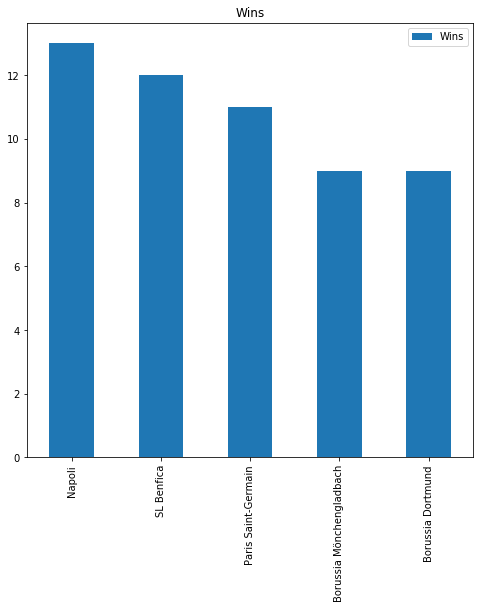

In [376]:
most_improved=total_vic16-total_vic08
most_improved.sort_values(['Wins'],ascending=[False],inplace=True)
improvement=most_improved.head()
improvement.plot(kind='bar',subplots=True,figsize=(8,8))

In [383]:
improvement.head()

,Wins
Napoli,13.0
SL Benfica,12.0
Paris Saint-Germain,11.0
Borussia Mönchengladbach,9.0
Borussia Dortmund,9.0


### Q2: Analysis of playing styles for the most successful teams for both 2008-09 and 2015-16 season, Is there a change in playing philosophy?

> The total victories table that was obtained above is used here to list out the five most dominant teams in the 2008-09 season

In [377]:
total_vic08.head()

,Wins
Manchester United,28.0
FC Barcelona,27.0
Rangers,26.0
Real Madrid CF,25.0
Inter,25.0


> The detailed team attributes data was listed out for these five teams from the initial team_08 table

In [378]:
vic_stats08=team_08.query('team_long_name=="Manchester United" | team_long_name=="FC Barcelona" | team_long_name=="Rangers"| team_long_name=="Real Madrid CF"|team_long_name=="Inter"')
vic_stats08.index=vic_stats08['team_long_name']
vic_stats08.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
team_long_name,,,,,,,,,,,,,,,,,,,,,
FC Barcelona,43042,8634,241,FC Barcelona,BAR,42,Balanced,Little,30,Short,...,70,Lots,Free Form,70,High,30,Contain,70,Wide,Offside Trap
Inter,20528,8636,44,Inter,INT,55,Balanced,Little,55,Mixed,...,70,Lots,Organised,50,Medium,60,Press,55,Normal,Cover
Manchester United,3457,10260,11,Manchester United,MUN,70,Fast,Little,45,Mixed,...,65,Normal,Free Form,40,Medium,50,Press,40,Normal,Cover
Rangers,39388,8548,86,Rangers,RAN,65,Balanced,Little,50,Mixed,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
Real Madrid CF,43040,8633,243,Real Madrid CF,REA,55,Balanced,Little,30,Short,...,70,Lots,Free Form,65,Medium,40,Press,65,Normal,Offside Trap


> The columns containing string values were dropped as our analysis was based on visualisation of different playing techniques such as :

> **1**: Speed of build up

> **2**: Accuracy of passing in build up

> **3**: Chances created by shooting 

> **4**: Chances created by crossing into the box

> **5**: Defensive organisation and aggression

In [ ]:
vic_stats08.drop(['id','team_api_id','team_fifa_api_id','team_long_name','team_short_name','buildUpPlayDribblingClass','buildUpPlayPassingClass','chanceCreationShootingClass','chanceCreationPositioningClass','defencePressureClass','defenceAggressionClass','defenceTeamWidthClass','defenceDefenderLineClass'],axis=1,inplace=True)
vic_stats08.drop(['buildUpPlaySpeedClass','buildUpPlayPositioningClass','chanceCreationPassingClass','chanceCreationCrossingClass'],axis=1,inplace=True)

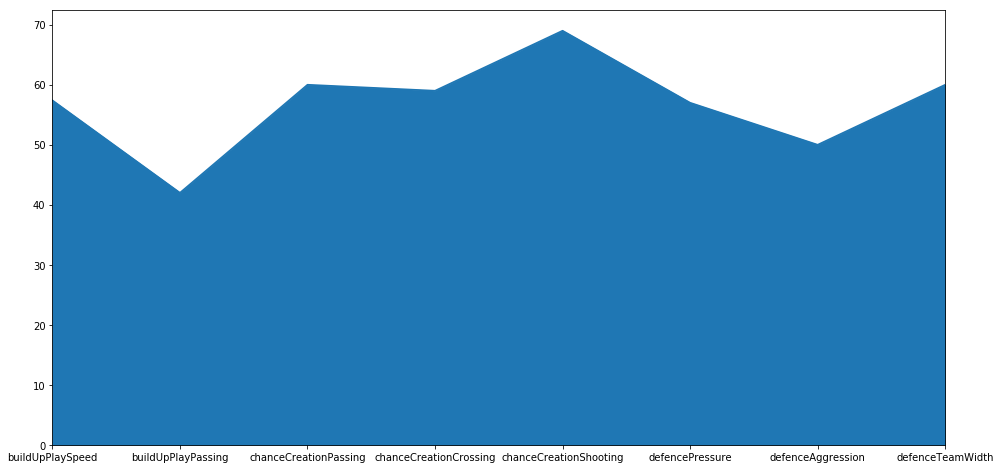

In [382]:
vic_stats08.mean().plot(kind='area',figsize=(16,8))

In [380]:
total_vic16.head()

,Wins
Paris Saint-Germain,30.0
Juventus,29.0
FC Barcelona,29.0
SL Benfica,29.0
FC Bayern Munich,28.0


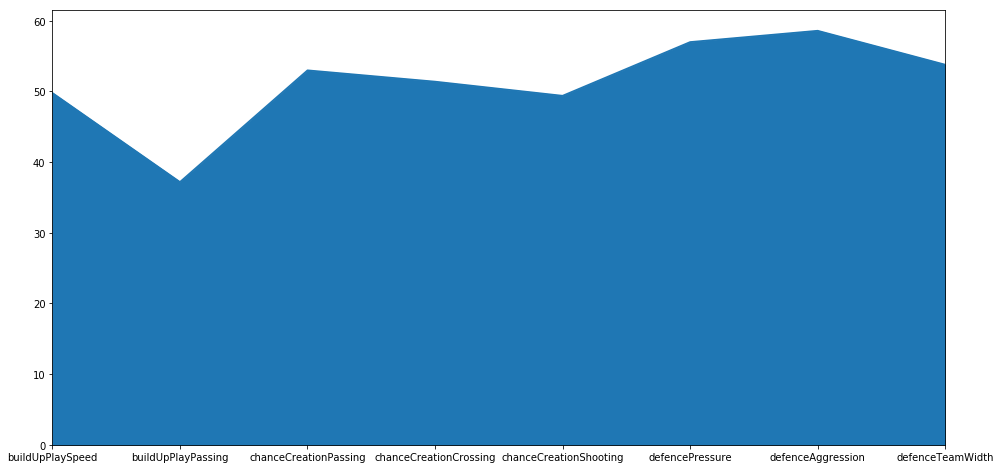

In [381]:
vic_stats16=team_16.query('team_long_name=="Paris Saint-Germain" | team_long_name=="FC Barcelona" | team_long_name=="Juventus"| team_long_name=="SL Benfica"|team_long_name=="FC Bayern Munich"')
vic_stats16.index=vic_stats16['team_long_name']
vic_stats16.drop(['id','team_api_id','team_fifa_api_id','team_long_name','team_short_name','buildUpPlayDribblingClass','buildUpPlayPassingClass','chanceCreationShootingClass','chanceCreationPositioningClass','defencePressureClass','defenceAggressionClass','defenceTeamWidthClass','defenceDefenderLineClass'],axis=1,inplace=True)
vic_stats16.drop(['buildUpPlaySpeedClass','buildUpPlayPositioningClass','chanceCreationPassingClass','chanceCreationCrossingClass'],axis=1,inplace=True)
vic_stats16.mean().plot(kind='area',figsize=(16,8))

<a id='conclusions'></a>
## Conclusions

> **1** : After performing the necessary analysis, It is evident that teams such as <i> Napoli, Benfica, Paris Saint Germain </i> were among the most improved teams improving by 13, 12, 11 victories respectively

> **2** : Observing the 2008-09 playing style bar-graph, dominance of high chance creation by shooting is noticed. This is accompanied by high speed of passing and high volume of crosses into the box pointing towards a more <b>attacking</b> style of play by successful teams in that particular time

> **3** : Observing the 2015-16 playing style bar-graph, a more <b>conservative</b> playing style is observed with focus on defensive aggression and pressure